In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X = np.random.uniform(-3, 3, 100).reshape(-1, 1)
y = 2 + 1.5 * X + 0.3 * X**2 + 0.05 * X**3 + np.random.randn(100, 1)
y = y.ravel()   # Convert to shape (100,)

In [3]:
poly=PolynomialFeatures(degree=10)
X_poly=poly.fit_transform(X)

scaler=StandardScaler()
X_poly_scaled=scaler.fit_transform(X_poly)

In [4]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly_scaled, y)

lasso_reg=Lasso(alpha=0.1, max_iter=5000)
lasso_reg.fit(X_poly_scaled, y)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,5000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [5]:
X_plot=np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly=poly.transform(X_plot)
X_plot_poly_scaled=scaler.transform(X_plot_poly)

y_plot_lin=lin_reg.predict(X_plot_poly_scaled)
y_plot_lasso=lasso_reg.predict(X_plot_poly_scaled)

In [6]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 1)
y shape: (100,)


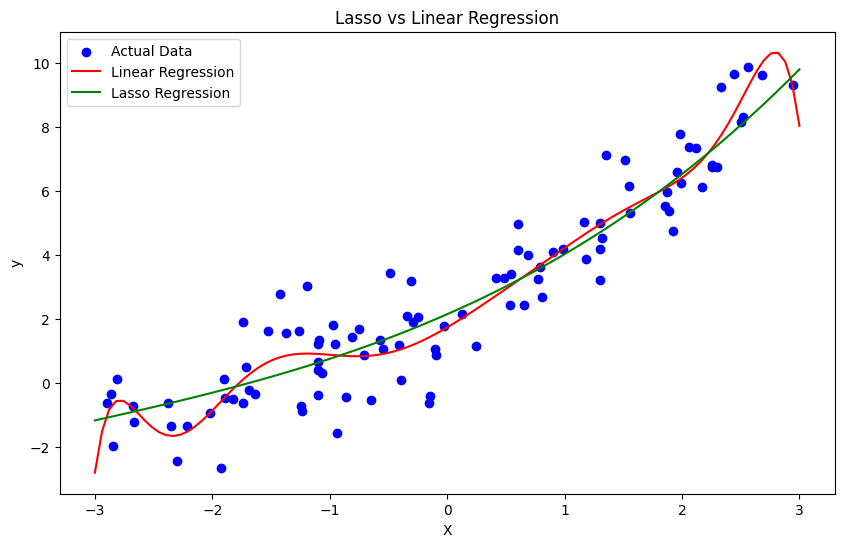

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot_lin, color='red', label='Linear Regression')
plt.plot(X_plot, y_plot_lasso, color='green', label='Lasso Regression')
plt.title("Lasso vs Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
